In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model = load_model('pavement_model-test-1.keras')

d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
df = pd.read_csv('pavement_data_2018.csv')

In [5]:
X = df.drop(columns=['PCI (%)', 'Section' , 'Potholes (number)','Delamination (m²)'])
y = df['PCI (%)']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
loss , mae = model.evaluate(X, y, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 239.4832 - mean_absolute_error: 8.5766 


In [26]:
out = model.predict(X)
print(out)
print(y)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', loss)
print('R2 Score:', r2_score(y, out))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[47.858326]
 [85.15521 ]
 [47.24319 ]
 [30.27248 ]
 [53.709404]
 [57.47708 ]
 [45.291855]
 [43.980774]
 [37.279655]
 [45.394966]
 [36.868893]
 [44.042072]
 [48.99629 ]
 [38.30989 ]
 [42.793995]
 [46.301907]
 [45.870476]
 [39.262146]
 [49.533012]
 [39.208008]
 [55.808777]
 [36.696476]
 [41.058743]
 [38.884468]
 [38.198833]
 [50.947742]
 [43.99263 ]
 [38.792355]
 [55.370247]
 [42.97471 ]
 [39.219017]
 [41.60211 ]
 [38.953125]
 [40.917664]
 [40.159172]
 [43.52384 ]
 [40.013435]]
0     20
1     12
2     24
3     30
4     75
5     50
6     40
7     35
8     28
9     45
10    38
11    55
12    46
13    39
14    27
15    53
16    44
17    41
18    36
19    42
20    49
21    37
22    43
23    48
24    34
25    50
26    52
27    47
28    54
29    35
30    45
31    40
32    33
33    44
34    39
35    48
36    41
Name: PCI (%), dtype: int64
Mean Absolute Error: 8.307056427001953
Mean Squared Error: 228.2938995361328
R2 Score: -0.8655200004577637


In [27]:
print("loss: ", loss)
print("mae: ", mae)


loss:  228.2938995361328
mae:  8.307056427001953


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


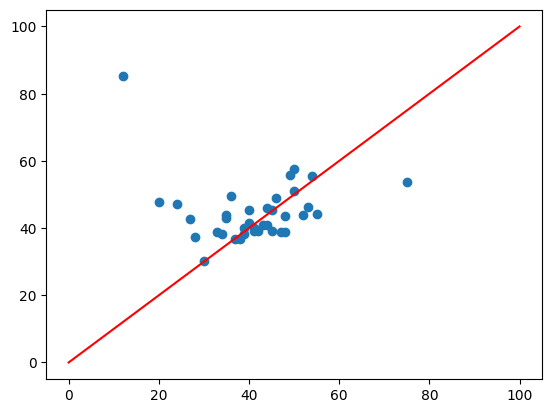

In [25]:
plt.plot(y, model.predict(X), 'o')
plt.plot([0, 100], [0, 100], 'r')
plt.show()
